#### 0. Przygotowanie bibliotek i narzędzi.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# przygotowanie danych
from sklearn.preprocessing import StandardScaler    # skalowanie zmiennych
from sklearn.model_selection import train_test_split    # podział na zbiór treningowy i testowy

# metryki
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# regresja liniowa
from sklearn.linear_model import LogisticRegression

# knn
from sklearn.neighbors import KNeighborsClassifier

# svc
from sklearn.svm import SVC

#### 1. Załadowanie danych z pliku ```wisc_bc_data.csv```.

In [5]:
file_path = "wisc_bc_data.csv"

In [6]:
df = pd.read_csv(file_path)

#### 2. Weryfikacja i ocena jakości danych.

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [9]:
len(df)

569

In [10]:
print("Podstawowe informacje o zbiorze danych:\n")
print(df.info())

Podstawowe informacje o zbiorze danych:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null  

**Uwaga: nie ma pustych wartości w zbiorze danych.**

In [12]:
print("\nStatystyki opisowe dla zmiennych liczbowych:\n")
df.describe()


Statystyki opisowe dla zmiennych liczbowych:



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# sprawdzenie duplikatów
duplicates = df.duplicated().sum()
duplicates

0

In [14]:
print(f"Unikalne wartości w 'diagnosis': {df['diagnosis'].unique()}")

Unikalne wartości w 'diagnosis': ['B' 'M']


In [15]:
# usunięcie kolumny 'id'
df.drop(columns=['id'], inplace=True)

# konwersja 'diagnosis' na wartości numeryczne
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# sprawdzenie zmian
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,0,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


#### 3. Eksploracyjna Analiza Danych.

In [17]:
# sprawdzenie liczby próbek w każdej klasie
class_distribution = df['diagnosis'].value_counts()
print("Rozkład klas w zbiorze danych:\n\n", class_distribution)

Rozkład klas w zbiorze danych:

 diagnosis
0    357
1    212
Name: count, dtype: int64


In [18]:
# obliczenie macierzy korelacji
correlation_matrix = df.corr()

# posortowanie korelacji względem zmiennej docelowej
correlation_with_target = correlation_matrix['diagnosis'].sort_values(ascending=False)
print("Korelacja cech ze zmienną docelową:\n\n", correlation_with_target)


Korelacja cech ze zmienną docelową:

 diagnosis            1.000000
points_worst         0.793566
perimeter_worst      0.782914
points_mean          0.776614
radius_worst         0.776454
perimeter_mean       0.742636
area_worst           0.733825
radius_mean          0.730029
area_mean            0.708984
concavity_mean       0.696360
concavity_worst      0.659610
compactness_mean     0.596534
compactness_worst    0.590998
radius_se            0.567134
perimeter_se         0.556141
area_se              0.548236
texture_worst        0.456903
smoothness_worst     0.421465
symmetry_worst       0.416294
texture_mean         0.415185
points_se            0.408042
smoothness_mean      0.358560
symmetry_mean        0.330499
dimension_worst      0.323872
compactness_se       0.292999
concavity_se         0.253730
dimension_se         0.077972
symmetry_se         -0.006522
texture_se          -0.008303
dimension_mean      -0.012838
smoothness_se       -0.067016
Name: diagnosis, dtype: float64


In [19]:
# statystyki opisowe dla wszystkich cech
data_description = df.describe()
print(data_description)

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  points_mean  \
count       569.000000        569.000000      569.000000   569.000000   
mean          0.096360          0.104341        0.088799     0.048919   
std           0.014064          0.052813        0.079720     0.038803   
min           

In [20]:
# sprawdzenie powielonych wartości
duplicates = df.duplicated().sum()
print(f"Liczba duplikatów w zbiorze danych: {duplicates}")

Liczba duplikatów w zbiorze danych: 0


In [21]:
# sprawdzenie, czy są cechy o niskiej zmienności (wartości prawie identyczne dla wszystkich)
low_variance_features = df.var()[df.var() < 0.01]
print("Cechy o niskiej zmienności:\n\n", low_variance_features)

Cechy o niskiej zmienności:

 smoothness_mean     0.000198
compactness_mean    0.002789
concavity_mean      0.006355
points_mean         0.001506
symmetry_mean       0.000752
dimension_mean      0.000050
smoothness_se       0.000009
compactness_se      0.000321
concavity_se        0.000911
points_se           0.000038
symmetry_se         0.000068
dimension_se        0.000007
smoothness_worst    0.000521
points_worst        0.004321
symmetry_worst      0.003828
dimension_worst     0.000326
dtype: float64


In [22]:
# lista najważniejszych cech (na podstawie korelacji)
important_features = ["points_worst", "perimeter_worst", "radius_worst"]

# sprawdzenie statystyk dla wybranych cech
print(df[important_features].describe())

       points_worst  perimeter_worst  radius_worst
count    569.000000       569.000000    569.000000
mean       0.114606       107.261213     16.269190
std        0.065732        33.602542      4.833242
min        0.000000        50.410000      7.930000
25%        0.064930        84.110000     13.010000
50%        0.099930        97.660000     14.970000
75%        0.161400       125.400000     18.790000
max        0.291000       251.200000     36.040000


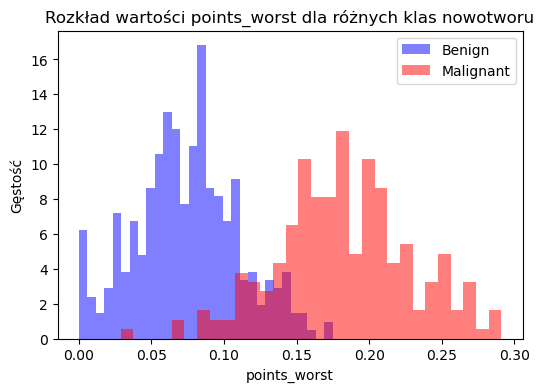

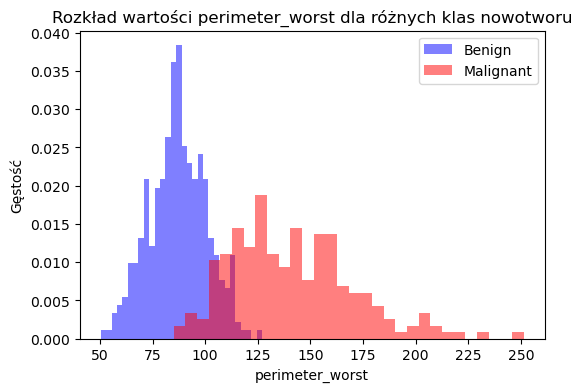

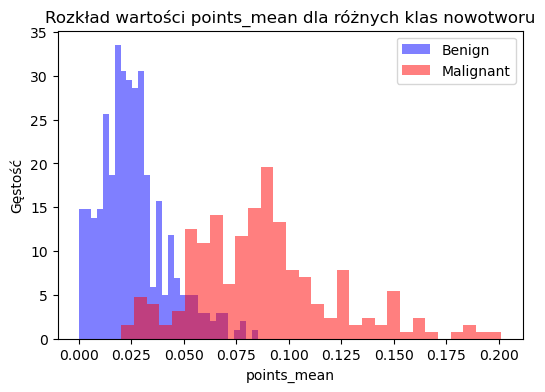

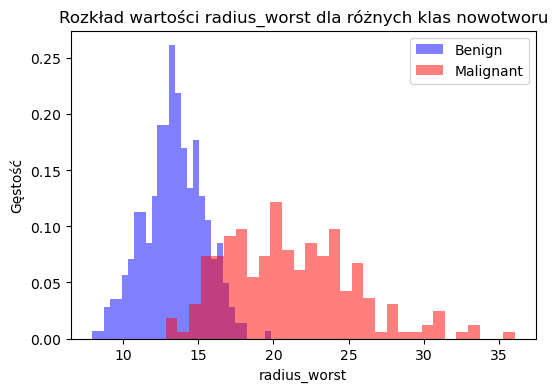

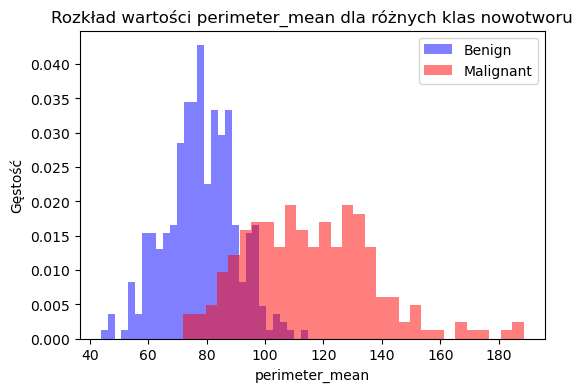

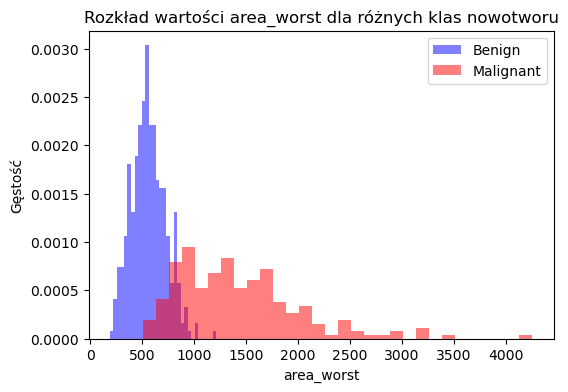

In [23]:
# wybór cech do histogramów - najbardziej skorelowane z diagnozą
important_features = [
    "points_worst", "perimeter_worst", "points_mean", 
    "radius_worst", "perimeter_mean", "area_worst"
]

# tworzenie histogramów dla wybranych cech
for feature in important_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[df['diagnosis'] == 0][feature], bins=30, alpha=0.5, label="Benign", color="blue", density=True)
    plt.hist(df[df['diagnosis'] == 1][feature], bins=30, alpha=0.5, label="Malignant", color="red", density=True)
    plt.xlabel(feature)
    plt.ylabel("Gęstość")
    plt.title(f"Rozkład wartości {feature} dla różnych klas nowotworu")
    plt.legend()
    plt.show()

In [24]:
# lista cech do usunięcia na podstawie niskiej wariancji
low_variance_features = [
    "smoothness_mean", "compactness_mean", "concavity_mean", "points_mean",
    "symmetry_mean", "dimension_mean", "smoothness_se", "compactness_se",
    "concavity_se", "points_se", "symmetry_se", "dimension_se",
    "smoothness_worst", "points_worst", "symmetry_worst", "dimension_worst"
]

# lista cech o bardzo niskiej korelacji do potencjalnego usunięcia
low_correlation_features = [
    "dimension_mean", "texture_se", "smoothness_se"
]

# połączenie list cech do usunięcia
features_to_remove = list(set(low_variance_features + low_correlation_features))

# usunięcie cech z DataFrame
df_reduced = df.drop(columns=features_to_remove)

# sprawdzenie nowego kształtu zbioru danych
print(f"Nowy kształt zbioru danych po redukcji cech: {df_reduced.shape}")

Nowy kształt zbioru danych po redukcji cech: (569, 14)


#### 4. Przygotowanie i utworzenie modeli.

In [26]:
# ustalenie cechy i zmiennej docelowej
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# podział danych na zbiór treningowy (80%) i testowy (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# normalizacja danych (ważne dla SVM i regresji logistycznej)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# lista najlepszych modeli (SVM, Logistic Regression, KNN)
best_models = {
    "Support Vector Machine": [SVC(kernel='rbf')],
    "Logistic Regression": [LogisticRegression()],
    "K-Nearest Neighbors": [KNeighborsClassifier(n_neighbors=5)]
}

# przechowywanie wyników dla metryk
metrics_results = {}

# test każdego modelu i analiza metryk
for name, lst in best_models.items():

    model = lst[0]
    
    # normalizacja dla SVM, LR i KNN
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # metryki jakości
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics_results[name] = [report]

    # macierz błędów
    cm = confusion_matrix(y_test, y_pred)
    metrics_results[name].append(cm)

#### 5. Ocena jakości i porównanie modeli.


Analiza modelu: Support Vector Machine

Model: Support Vector Machine
Dokładność: 0.9825
Precyzja (Precision): 0.9762
Czułość (Recall): 0.9762
F1-score: 0.9762



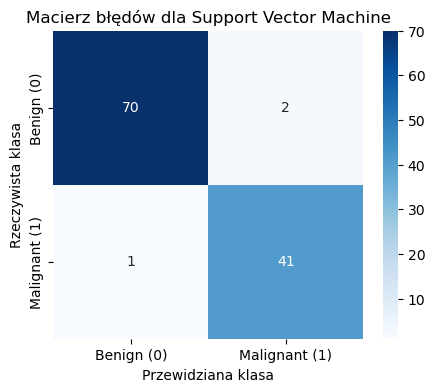


Analiza modelu: Logistic Regression

Model: Logistic Regression
Dokładność: 0.9737
Precyzja (Precision): 0.9535
Czułość (Recall): 0.9762
F1-score: 0.9647



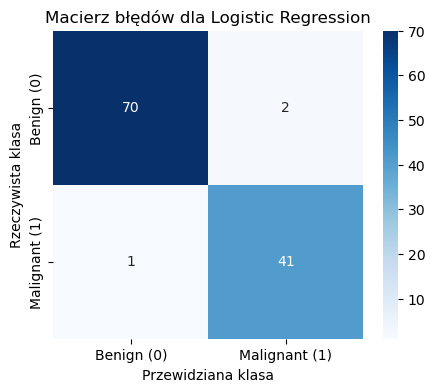


Analiza modelu: K-Nearest Neighbors

Model: K-Nearest Neighbors
Dokładność: 0.9737
Precyzja (Precision): 0.9535
Czułość (Recall): 0.9762
F1-score: 0.9647



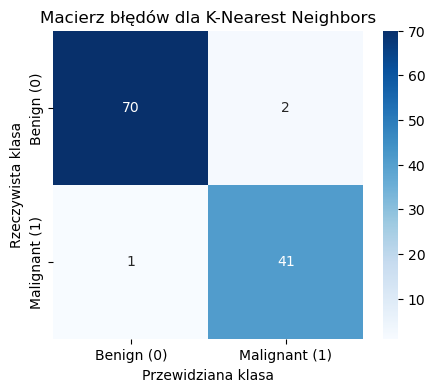

In [29]:
# wyświetlenie metryk jakości dla każdego modelu
for name, report in metrics_results.items():
    print(f"\nAnaliza modelu: {name}")
    
    print(f"\nModel: {name}")
    print(f"Dokładność: {report[0]['accuracy']:.4f}")
    print(f"Precyzja (Precision): {report[0]['1']['precision']:.4f}")
    print(f"Czułość (Recall): {report[0]['1']['recall']:.4f}")
    print(f"F1-score: {report[0]['1']['f1-score']:.4f}\n")

    # wizualizacja macierzy błędów
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
    plt.xlabel("Przewidziana klasa")
    plt.ylabel("Rzeczywista klasa")
    plt.title(f"Macierz błędów dla {name}")
    plt.show()